# 66 Generating Voronoi Polygons

This notebook illustrates the creation of Thiessen Polygons to illustrate the the data quantity of borehole data according to page 236 of the following report of the BGE: https://www.bge.de/fileadmin/user_upload/Standortsuche/Wesentliche_Unterlagen/Methodik/Phase_I_Schritt_2/rvSU-Methodik/20220328_Anlage_zu_rvSU_Konzept_Methodenbeschreibung_barrierefrei.pdf


## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import gemgis as gg
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
file_path ='data/66_generating_voronoi_polygons/'
# gg.download_gemgis_data.download_tutorial_data(filename="66_generating_voronoi_polygons.zip", dirpath=file_path)

## Loading Borehole Data

The borehole data was extracted from the borehole database of the Geological Survey of NRW (https://www.gd.nrw.de/gd_archive_dabo.htm).

In [3]:
data = gpd.read_file(file_path + 'Bohrungen_groesser_1000.shp')
data.head()

,Index,DABO No.,Name,Number,Depth,X,Y,Z,X_GK,Y_GK,...,Kind,Procedure,Confidenti,Record Typ,Lithlog Ve,Quality,Drilling P,Remarks,Availabili,geometry
0,GD10092,DABO_102029,Klingerhuf1(1982),NaN,1118.00,32332544.77,5701554.56,30.80,2541103.04,5700806.87,...,Bohrung,gemischtes Bohrverfahren,offen; Bohrung mit dokumentiertem Freigabeverm...,Übertragung eines alten Archivbestandes,1,Schichtdaten von guter Qualität; genaue strati...,30.9.1982 - 1.12.1982,Karbon Cumulus,Original-Schichtenverzeichnis liegt vor,POINT (32332544.770 5701554.560)
1,GD50035,DABO_1521,Salzbergen2,NaN,1875.70,32388961.53,5798219.66,30.00,2593500.00,5799735.00,...,Bohrung,gemischtes Bohrverfahren,"vertraulich, offen nur mit Einwilligung; Eigen...",Aufnahme durch Sachbearbeiter; überarbeitet na...,1,Schichtdaten von guter Qualität; genaue strati...,15.2.1949 - 27.5.1950,paläontologisch untersucht; Ausführliche Unter...,Original-Schichtenverzeichnis liegt vor,POINT (32388961.530 5798219.660)
2,GD50073,DABO_1564,B.Salzbergen3,3,1908.90,32390628.91,5799824.32,36.00,2595100.00,5801408.00,...,Bohrung,Spülbohrung (Rotary-Verfahren),"vertraulich, offen nur mit Einwilligung; Eigen...",Übertragung eines alten Archivbestandes,1,Schichtdaten von guter Qualität; genaue strati...,19.10.1950 - 25.5.1951,siehe Original-Schichtenverzeichnis,Original-Schichtenverzeichnis liegt vor,POINT (32390628.910 5799824.320)
3,GD50261,DABO_2319,Ibbenbüren-Westfeld1,UB1121,1352.00,32409115.65,5798184.48,118.20,3409152.00,5800063.00,...,Bohrung,gemischtes Bohrverfahren,offen; Bohrung mit dokumentiertem Freigabeverm...,Übertragung eines alten Archivbestandes,1,Schichtdaten von guter Qualität; genaue strati...,11.11.1974 - 14.1.1975,Karbon Cumulus,Original-Schichtenverzeichnis liegt vor,POINT (32409115.650 5798184.480)
4,GD51096,DABO_7331,GildehausZ1,NaN,1683.10,32370464.85,5790221.74,40.00,2575345.00,5790975.00,...,Bohrung,gemischtes Bohrverfahren,"vertraulich, offen nur mit Einwilligung; Eigen...",Aufnahme durch Sachbearbeiter; überarbeitet na...,1,Schichtdaten von guter Qualität; genaue strati...,..1956,Ausführliche Unterlagen im Original,Original-Schichtenverzeichnis liegt vor,POINT (32370464.850 5790221.740)


## Loading the Outline of NRW

In [4]:
outline = gpd.read_file(file_path + 'outline.shp')
outline

,osm_id,class,type,name,address,extratags,geometry
0,62761.00,boundary,administrative,"North Rhine-Westphalia, Germany","""state""=>""North Rhine-Westphalia"",""ISO3166-2-l...","""ref:nuts""=>""DEA"",""wikidata""=>""Q1198"",""wikiped...","MULTIPOLYGON (((300636.227 5600913.724, 300639..."


In [5]:
outline.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.01, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Plotting the Borehole Data

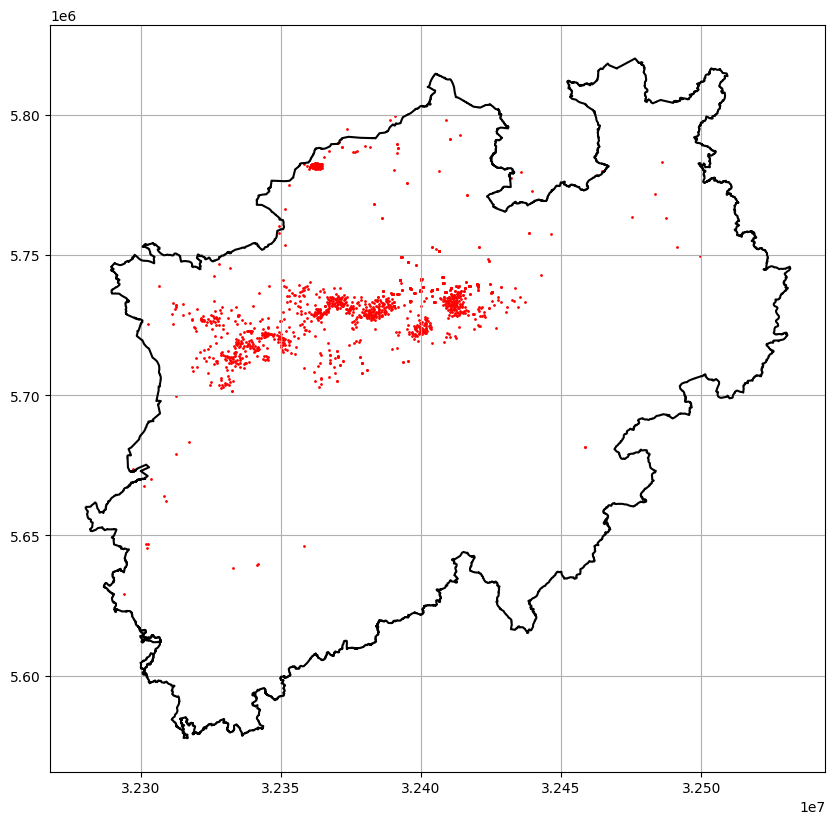

In [6]:
fig, ax = plt.subplots(1, figsize=(10,10))

outline.to_crs('EPSG:4647').boundary.plot(ax=ax, color='black')
data.plot(ax=ax, markersize=1, color='red')

plt.grid()

## Voronoi Tessalation

In [8]:
gdf = gg.vector.create_voronoi_polygons(data)
gdf

,geometry,area
0,"POLYGON ((32473194.081 5718253.741, 32469287.8...",665698318.29
1,"POLYGON ((32473175.498 5773862.463, 32481354.2...",184545066.31
2,"POLYGON ((32481354.247 5765667.587, 32481234.9...",304148453.73
3,"POLYGON ((32459819.403 5765274.413, 32473175.4...",490884327.21
4,"POLYGON ((32317260.014 5640927.969, 32314568.7...",250801576.02
...,...,...
1131,"POLYGON ((32326629.143 5727191.374, 32326669.3...",922649.29
1132,"POLYGON ((32326895.182 5726701.188, 32327147.6...",1407420.98
1133,"POLYGON ((32327531.454 5727716.570, 32327549.9...",349756.27
1134,"POLYGON ((32327677.535 5727156.396, 32328944.7...",1725230.07


## Plotting Valid Voronoi Polygons

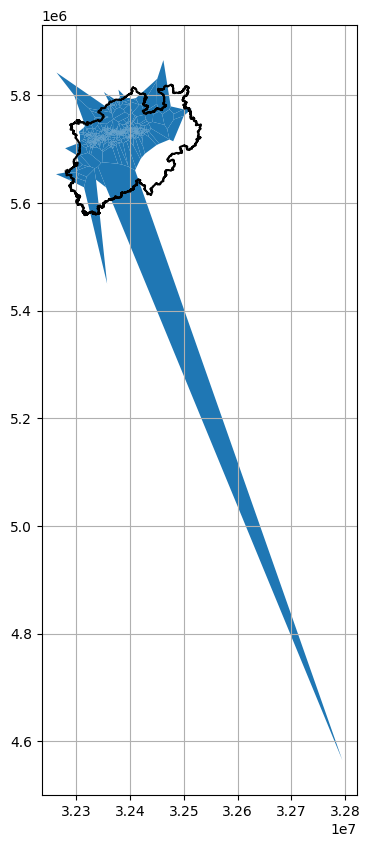

In [9]:
fig, ax = plt.subplots(1, figsize=(10,10))

gdf.plot(ax=ax)
outline.to_crs('EPSG:4647').boundary.plot(ax=ax, color='black')

plt.grid()
plt.show()

## Plotting GeoDataFrame

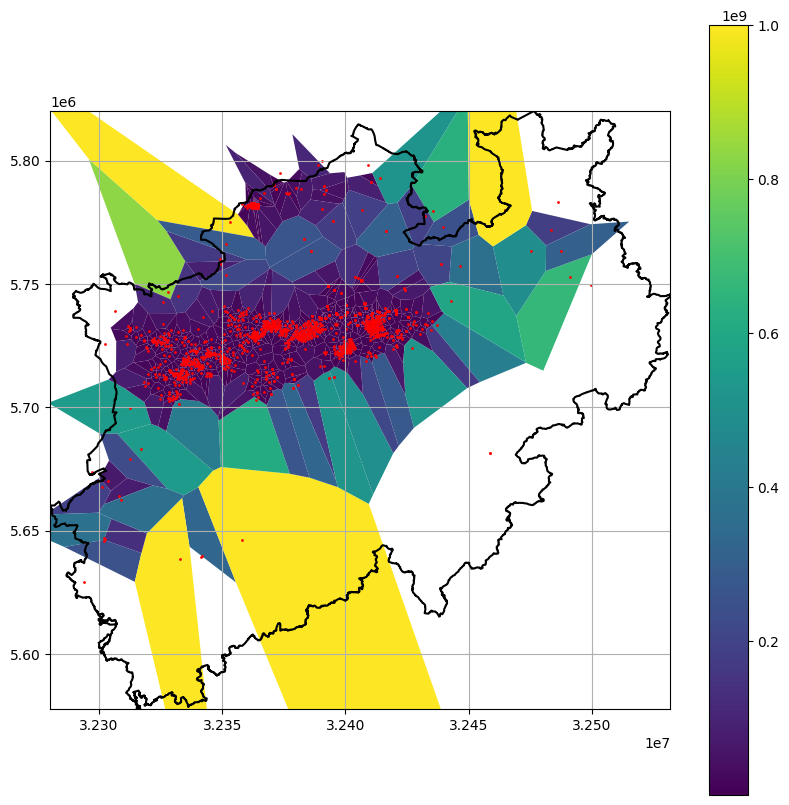

In [10]:
fig, ax = plt.subplots(1, figsize=(10,10))

outline.to_crs('EPSG:4647').boundary.plot(ax=ax, color='black')#
gdf.plot(ax=ax, column='area', vmax=1e9, legend=True)
data.plot(ax=ax, markersize=1, color='red')

plt.xlim(outline.to_crs('EPSG:4647').total_bounds[0], outline.to_crs('EPSG:4647').total_bounds[2])
plt.ylim(outline.to_crs('EPSG:4647').total_bounds[1], outline.to_crs('EPSG:4647').total_bounds[3])
plt.grid()
plt.show()